In [54]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

1. Самостоятельно постройте парные регрессии от каждого атрибута с целевой переменной.

In [66]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2%20multivariate/data/0_x.csv', header=None)
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2%20multivariate/data/0_y.csv', header=None)

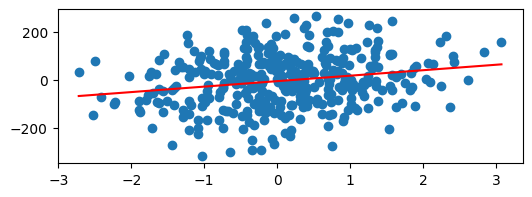

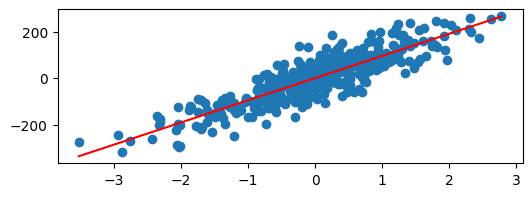

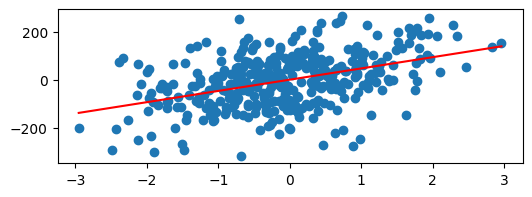

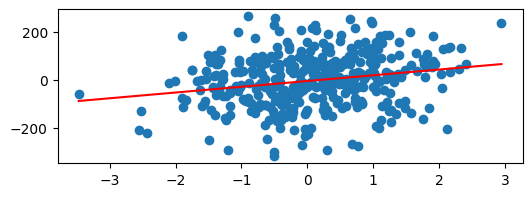

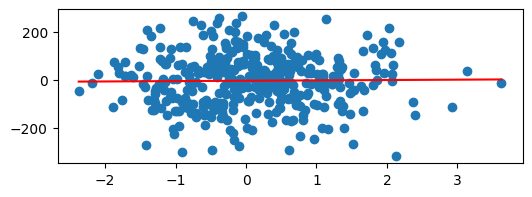

In [71]:
list_modules = []
for i in range(5):
  module = LinearRegression()
  module.fit(x[[i]], y)
  xx = np.linspace(x[[i]].min(),x[[i]].max(), 100).reshape((-1, 1))
  plt.figure(figsize=(6, 2))
  plot = plt.scatter(x[[i]], y)
  line = plt.plot(xx, module.predict(xx), c='r')

2. Модифицируйте код из предыдущей работы так, чтобы модель регрессии умела работать с входными данными, состоящими из произвольного количества столбцов.

In [72]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self, num_parametrs):
        self.b = np.zeros(num_parametrs).reshape(num_parametrs, 1)
    def predict(self, X):
        return X.dot(self.b)
    def error(self, X, Y):
        f = X.dot(self.b) - Y
        return (1/(2*X.shape[0]))*(f.T).dot(f)
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=10000):
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            f = (X.T).dot(X.dot(self.b) - Y)
            self.b -= alpha * (1/len(X)) * f
            errors.append(self.error(X,Y)[0][0])
            step += 1
            steps.append(step)
        return steps, errors

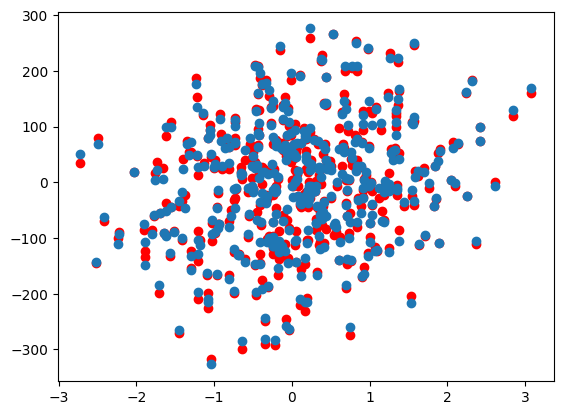

In [73]:
hyp = Model(x.shape[1])
step_, err = hyp.fit(X = x.values, Y = y.values)
hyp.error(X = x.values, Y = y.values)

plt.scatter(x[[0]], y, c = 'red')
plt.scatter(x[[0]], hyp.predict(x.values))

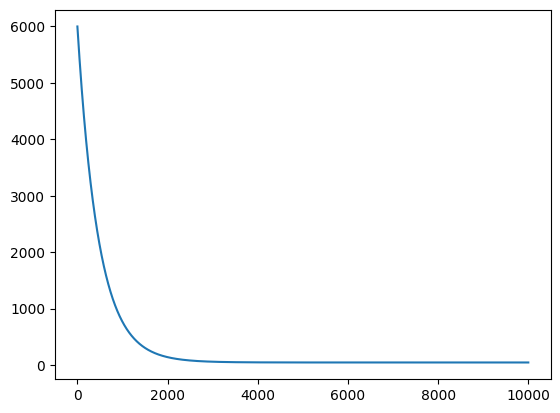

In [74]:
plt.plot(step_, err)

3. Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. Сделайте вывод о значимости регрессии.

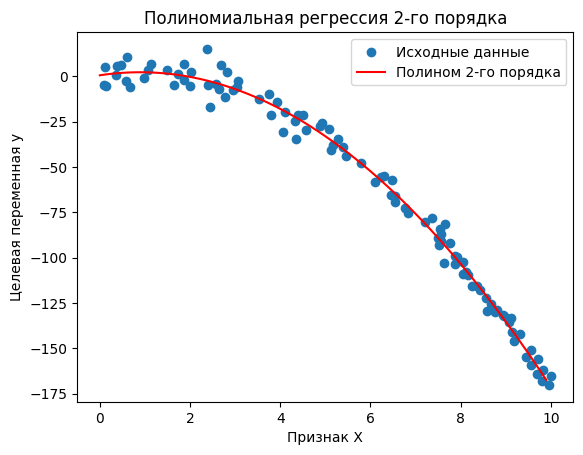

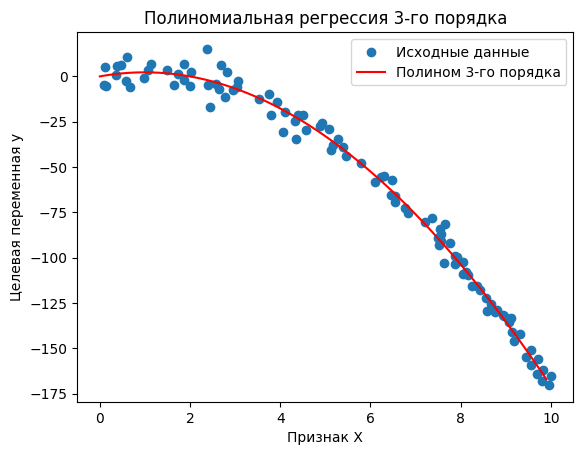

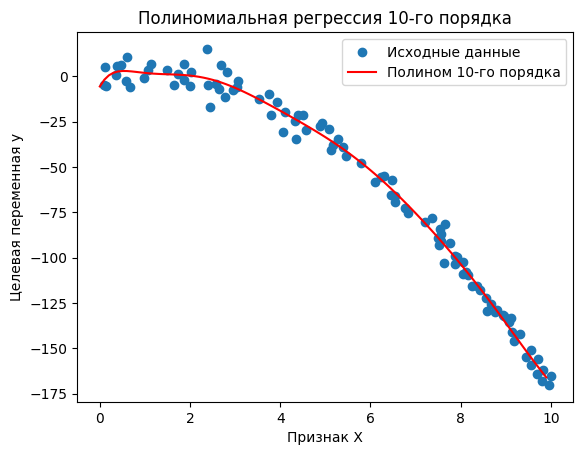

In [75]:
X = np.random.rand(100, 1) * 10
y = 3 * X.squeeze() - 2 * (X.squeeze())**2 + 5 * np.random.randn(100)

# Построение полиномиальных регрессий разных порядков
degrees = [2, 3, 10]

for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)

    # Предсказание значений для построения графика
    X_plot = np.arange(0, 10, 0.1)[:, np.newaxis]
    y_plot = model.predict(X_plot)

    # Визуализация данных и регрессии
    plt.scatter(X, y, label='Исходные данные')
    plt.plot(X_plot, y_plot, label=f'Полином {degree}-го порядка', color='red')
    plt.title(f'Полиномиальная регрессия {degree}-го порядка')
    plt.xlabel('Признак X')
    plt.ylabel('Целевая переменная y')
    plt.legend()
    plt.show()

4. Постройте сводную таблицу показателей точности всех построенных моделей. Сделайте вывод, какие модели переобученнные, какие - недообученные.

In [82]:
X = np.random.rand(100, 1) * 10
y = 3 * X.squeeze() - 2 * (X.squeeze())**2 + 5 * np.random.randn(100)

# Создание данных для сводной таблицы
data = {'Модель': [], 'Степень полинома': [], 'Среднеквадратичная ошибка': []}

# Построение полиномиальных регрессий разных порядков
degrees = [2, 3, 10]

for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)

    # Предсказание значений для оценки точности
    y_pred = model.predict(X)

    # Рассчет среднеквадратичной ошибки
    mse = mean_squared_error(y, y_pred)

    # Заполнение данных для сводной таблицы
    data['Модель'].append(f'Полином {degree}-го порядка')
    data['Степень полинома'].append(degree)
    data['Среднеквадратичная ошибка'].append(mse)

# Создание сводной таблицы
df_accuracy = pd.DataFrame(data)

# Вывод сводной таблицы
df_accuracy

,Модель,Степень полинома,Среднеквадратичная ошибка
0,Полином 2-го порядка,2,23.486813
1,Полином 3-го порядка,3,22.065051
2,Полином 10-го порядка,10,21.118952



Недообучение:
Модели с высокой среднеквадратичной ошибкой могут быть недообученными,
что указывает на то, что они не смогли адекватно подстроиться под данные.

Переобучение:
Модели с очень низкой среднеквадратичной ошибкой на тренировочных данных,
но с высокой на новых данных, могут быть подозрительными на переобучение.
Очень сложные модели, такие как полином 10-го порядка, могут склонны к переобучению.


5. Используйте другие метрики качества регрессионной модели в дополнение к коэффициенту детерминации.

In [83]:
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
baseline_model = np.mean(y)  # Пример базовой модели (предсказание среднего значения)
single_value = -58.413287128790344
reshaped_array = np.array(single_value).reshape(1, -1)

In [84]:
X_train = np.random.rand(100, 1)
y_train = 2 * X_train.squeeze() + 1 + 0.1 * np.random.randn(100)  # Пример: линейная зависимость с шумом

# Измерение времени обучения для полиномов разных степеней
degrees = [2, 3, 4, 5]
training_times = []

for degree in degrees:
    start_time = time.time()

    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)

    end_time = time.time()
    elapsed_time = end_time - start_time
    training_times.append(elapsed_time)

    print(f"Время обучения для полинома степени {degree}: {elapsed_time:.4f} секунд")

print()
# Вывод результатов
for degree, time_taken in zip(degrees, training_times):
    print(f"Степень полинома: {degree}, Время обучения: {time_taken:.4f} секунд")

Время обучения для полинома степени 2: 0.0031 секунд
Время обучения для полинома степени 3: 0.0019 секунд
Время обучения для полинома степени 4: 0.0016 секунд
Время обучения для полинома степени 5: 0.0015 секунд

Степень полинома: 2, Время обучения: 0.0031 секунд
Степень полинома: 3, Время обучения: 0.0019 секунд
Степень полинома: 4, Время обучения: 0.0016 секунд
Степень полинома: 5, Время обучения: 0.0015 секунд
